## Autoencoders

In [169]:
import numpy as np
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import LSTM, RepeatVector
from keras.preprocessing import sequence
from keras.datasets import mnist, imdb
#can also include dropout, recurrent dropout, L1 regularization

### Deep Neural Net

First, let's first build a simple, feed-forward autoencoder using the mnist dataset.

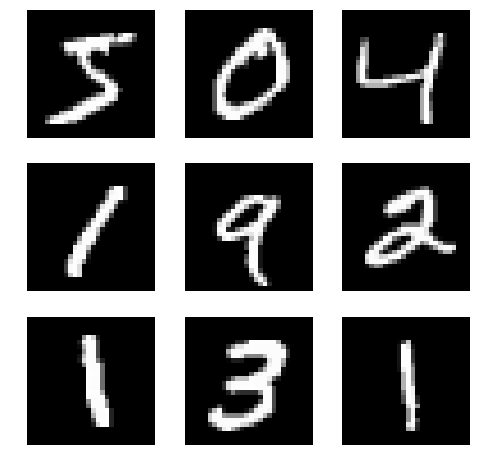

In [170]:
#load data
(x_train, _), (x_test, _) = mnist.load_data()

#plot sample data
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')

#reformat data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [171]:
#create model
model = Sequential()

#encoder layers
model.add(Dense(64, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

#decoder layers
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(784))
model.add(Activation('sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy')


model.summary()

In [172]:
#fit model
model.fit(x_train, x_train, batch_size=128, epochs=10,
          shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2338 - val_loss: 0.1749
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1612 - val_loss: 0.1495
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1455 - val_loss: 0.1394
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1379 - val_loss: 0.1338
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1338 - val_loss: 0.1307
Epoch 6/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1301 - val_loss: 0.1267
Epoch 7/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1274 - val_loss: 0.1248
Epoch 8/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1252 - val_loss: 0.1229
Epoch 9/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1233 - val_loss: 0.1

In [173]:
#run the model on x_test
reconstructed_imgs = model.predict(x_test)

Let's take a look at the original images and their reconstructed counterparts:

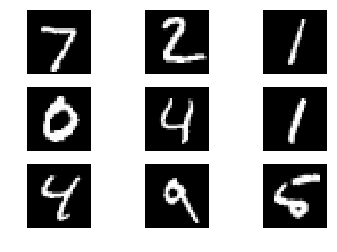

In [174]:
#Original images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')

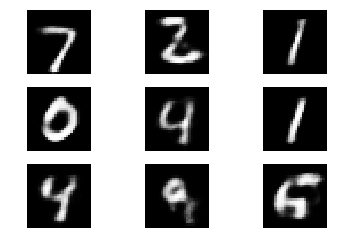

In [175]:
#Reconstructed images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(reconstructed_imgs[i].reshape(28,28), cmap='gray', interpolation='none')

Not bad, but now let's do the same thing using a Convolutional Autoencoder.

### Convolutional Neural Net

In [176]:
#reload data
(x_train, _), (x_test, _) = mnist.load_data()

#reformat data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

(10000, 28, 28, 1)

In [177]:
#create model
model2 = Sequential()

#encoding layers
model2.add(Conv2D(input_shape=(28,28,1), filters=16, kernel_size=(3,3),
                  padding='same', kernel_initializer='he_uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2,2), padding='same'))

model2.add(Conv2D(8, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2,2), padding='same'))

model2.add(Conv2D(8, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2,2), padding='same'))

#decoding layers
model2.add(Conv2D(8, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(UpSampling2D((2,2)))

model2.add(Conv2D(8, (3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(UpSampling2D((2,2)))

model2.add(Conv2D(16, (3,3), padding='valid'))
model2.add(Activation('relu'))
model2.add(UpSampling2D((2,2)))

#final layer
model2.add(Conv2D(1, (3,3), activation='sigmoid', padding='same'))

model2.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_215 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
activation_220 (Activation)  (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
activation_221 (Activation)  (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 7, 7, 8)           584       
__________

In [178]:
#fit model
model2.fit(x_train, x_train, epochs=5, batch_size=128,
          shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.2169 - val_loss: 0.1640
Epoch 2/5
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1566 - val_loss: 0.1499
Epoch 3/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1480 - val_loss: 0.1444
Epoch 4/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1436 - val_loss: 0.1410
Epoch 5/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1405 - val_loss: 0.1382


In [179]:
#run the model on x_test
reconstructed_imgs = model2.predict(x_test)

Again, here's another look at the original images:

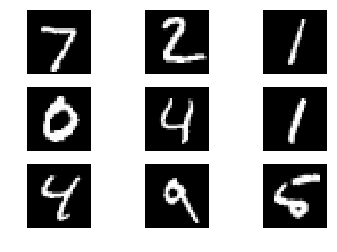

In [180]:
#Original images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')

And the reconstructed images:

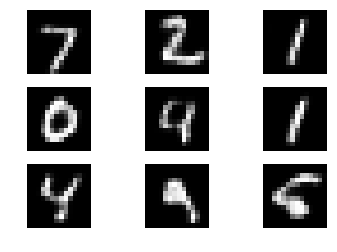

In [181]:
#Reconstructed images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(reconstructed_imgs[i].reshape(28,28), cmap='gray', interpolation='none')

Now let's try a basic sequential (RNN based) autoencoder on imdb reviews. (Not the best dataset to use this technique out, but I just wanted to demonstrate a basic version.)

### Recurrent Neural Net

In [183]:
#load data
max_idx = 10000

(x_train, _), (x_test, _) = imdb.load_data(num_words=max_idx)

In [184]:
#Reformat data
max_len = 400

x_train=sequence.pad_sequences(x_train, max_len)
x_test=sequence.pad_sequences(x_test, max_len)

x_train = x_train.reshape(25000,400,1)
x_test = x_test.reshape(25000,400,1)

In [185]:
#create model
model = Sequential()

#enconding layers
model.add(LSTM(16, input_shape=(400,1), return_sequences=True))
model.add(LSTM(8, return_sequences=False))

#decoding layers
model.add(RepeatVector(400))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(1, return_sequences=True))

model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 400, 16)           1152      
_________________________________________________________________
lstm_15 (LSTM)               (None, 8)                 800       
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 400, 8)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 400, 16)           1600      
_________________________________________________________________
lstm_17 (LSTM)               (None, 400, 1)            72        
Total params: 3,624
Trainable params: 3,624
Non-trainable params: 0
_________________________________________________________________


In [186]:
#fit model
model.fit(x_train, x_train, epochs=5, batch_size=128,
          shuffle=True, validation_data=(x_test, x_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/7
25000/25000 [==============================] - 140s 6ms/step - loss: -3698.2799 - val_loss: -5716.8291
Epoch 2/7
25000/25000 [==============================] - 131s 5ms/step - loss: -6004.3289 - val_loss: -5723.2061
Epoch 3/7
25000/25000 [==============================] - 138s 6ms/step - loss: -6010.0841 - val_loss: -5727.7212
Epoch 4/7
25000/25000 [==============================] - 139s 6ms/step - loss: -6014.5680 - val_loss: -5731.2931
Epoch 5/7
25000/25000 [==============================] - 144s 6ms/step - loss: -6017.8644 - val_loss: -5733.9030
Epoch 6/7
25000/25000 [==============================] - 146s 6ms/step - loss: -6020.4956 - val_loss: -5736.1501
Epoch 7/7
25000/25000 [==============================] - 148s 6ms/step - loss: -6022.8849 - val_loss: -5738.1852


Let's take a look at one of the reconstructed responses:

In [188]:
#run the model on x_test
reconstructed_text = model.predict(x_test)

reconstructed_text[0]

array([[0.30094847],
       [0.6628613 ],
       [0.8935119 ],
       [0.9947538 ],
       [0.99921554],
       [0.9998881 ],
       [0.99998426],
       [0.9999979 ],
       [0.9999999 ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   